In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ningom","key":"53b8540e06ccbede8759befaff246b35"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                     title                                             size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
timoboz/superbowl-history-1967-2020                     Superbowl History 1967 - 2020                      2KB  2020-02-03 23:41:14           1053  
timoboz/google-trends-data                              Google Trends Data                                 1MB  2020-02-04 17:31:10           1110  
fmejia21/demographics-of-academy-awards-oscars-winners  Demographics of Academy Awards (Oscars) Winners   20KB  2020-02-04 17:38:26            806  
timoboz/big-list-of-naughty-strings                     Big List of Naughty Strings                       66KB  2020-02-04 18:11:53             88  
fmejia21/2020-democratic-primary-endorsements           2020 Democratic Primary Endorsements              

In [0]:
!ls -a

.  ..  .config	sample_data


In [0]:
# download API key from google drive
## Original: https://colab.research.google.com/drive/1eufc8aNCdjHbrBhuy7M7X6BGyzAyRbrF#scrollTo=y5_288BYp6H1
## When you run for the first time, you will see a link to authenticate.

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!kaggle competitions list -s talkingdata

ref                                     deadline             category   reward  teamCount  userHasEntered  
--------------------------------------  -------------------  --------  -------  ---------  --------------  
talkingdata-adtracking-fraud-detection  2018-05-07 23:59:00  Featured  $25,000       3946           False  
talkingdata-mobile-user-demographics    2016-09-05 23:59:00  Featured  $25,000       1688           False  


In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1        75G   38G   38G  50% /opt/bin
shm             5.9G  4.0K  5.9G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.38MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 25.1MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 54.0MB/s]


In [0]:
!ls

adc.json  gender_submission.csv  sample_data  test.csv	train.csv


In [0]:
#データ取得
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#train_pd.head()
#test_pd.head()

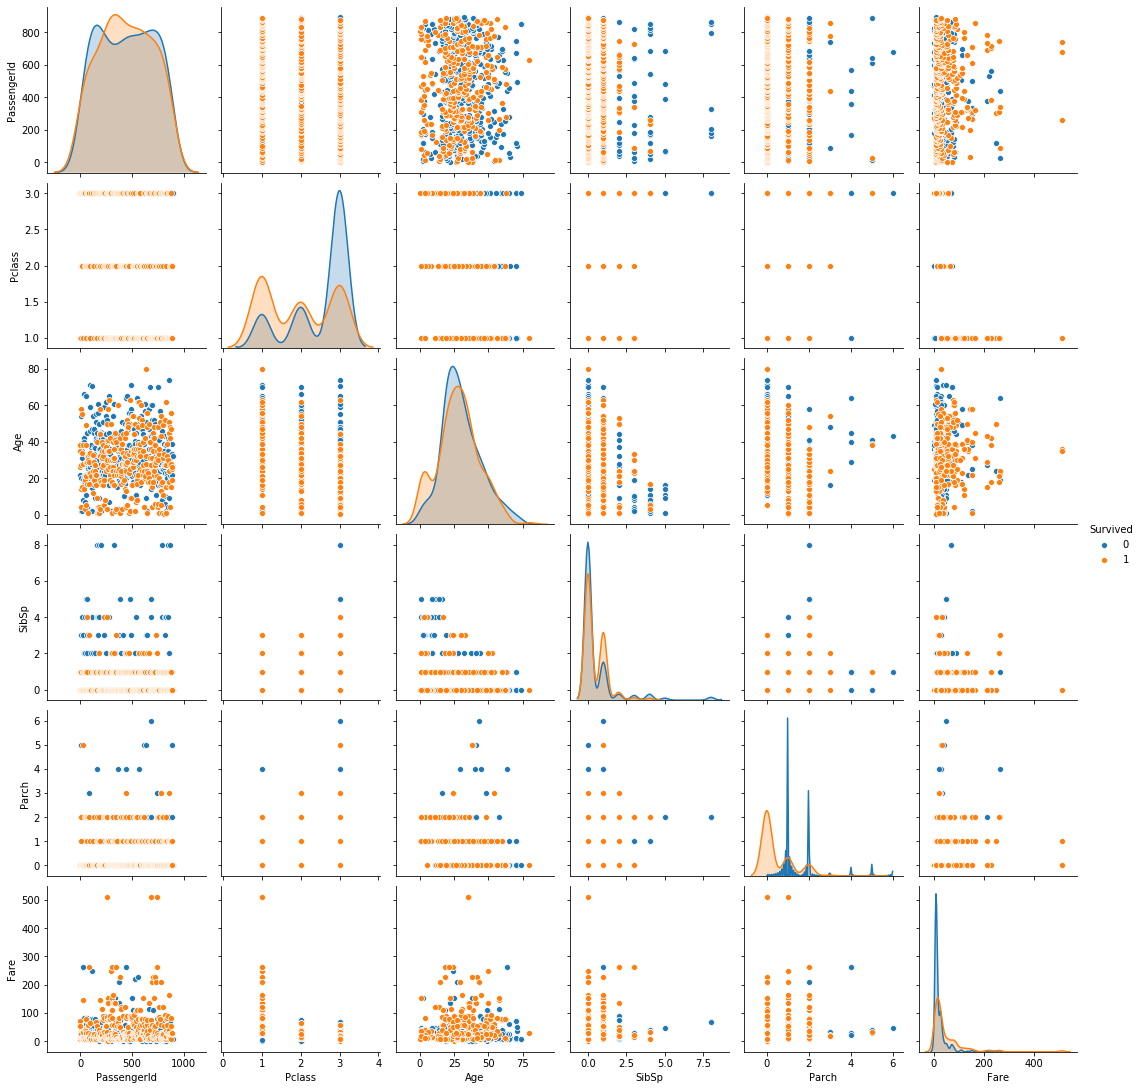

In [0]:
#データの可視化
import seaborn as sns
sns.pairplot(train_df, hue="Survived")

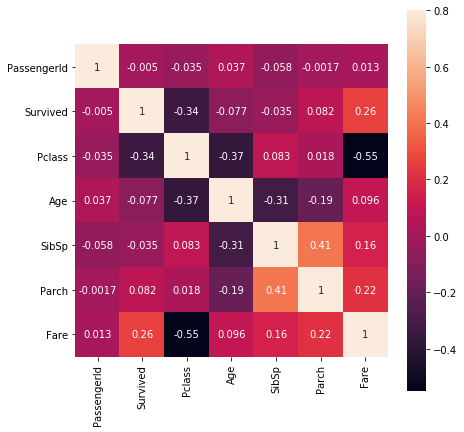

In [0]:
#相関係数をヒートマップで 
import matplotlib.pyplot as plt
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,  annot=True,vmax=.8, square=True)

In [0]:
#drop dates
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

In [0]:
# 文字列の数値置換
train_df.Embarked = train_df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
train_df.Sex = train_df.Sex.replace(['male', 'female'], [0, 1])
train_df.Age = train_df.Age.replace('NaN', 0)

In [0]:
#データの分割(t_train:正解ラベル,x_train:トレーニングデータ)
t_train=train_df["Survived"].values
x_train=train_df
x_train.drop("Survived",axis=1,inplace=True)
x_train=x_train.values

In [0]:
#標準化(正規化じゃない方でやってみた)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scl = StandardScaler() #MinMaxScaler() or Robustscaler
x_train=std_scl.fit_transform(x_train).astype(np.int64)

In [0]:
#モデル構築
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
model=SVC(random_state=0)

extension= [2**(-4),2**(-3),2**(-2),2**(-1),1,2,4,8,16,32]
params =[
    {"C":extension, "kernel": ["rbf"], "gamma": extension},
        ]
gs = GridSearchCV(model, params, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(x_train,t_train)
print(f"Best Score: {gs.score(x_train,t_train)}")
print(f"Best Params: {gs.best_params_}")

Best Score: 0.8294051627384961
Best Params: {'C': 0.25, 'gamma': 1, 'kernel': 'rbf'}


In [0]:
#モデルの整形
model=SVC(random_state=0, C=0.25,gamma=1)
model.fit(x_train,t_train)

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#トレーニングデータに対する正解率の算出
from sklearn.metrics import accuracy_score

y_train=model.predict(x_train)
acc_train=accuracy_score(y_train,t_train)
print(acc_train)

0.8294051627384961


In [0]:
#提出用の作成
passengerId_data=test_df.PassengerId.values
#drop dates
test_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# 文字列の数値置換
test_df.Embarked = test_df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
test_df.Sex = test_df.Sex.replace(['male', 'female'], [0, 1])
test_df.Age = test_df.Age.replace('NaN', 0)

#データの分割
x_test=test_df.values

#標準化(正規化じゃない方でやってみた)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scl = StandardScaler() #MinMaxScaler() or Robustscaler
x_test=std_scl.fit_transform(x_test).astype(np.int64)



In [0]:
#予測
y_test=model.predict(x_test)

submit_df=pd.DataFrame(passengerId_data.T,columns=["PassengerId"])
submit_df["Survived"]=y_test.T

In [0]:
#csvへ
submit_df.to_csv("result.csv",index=False)

In [0]:
!kaggle competitions submit -c titanic -f result.csv -m 'first submit'

100% 2.77k/2.77k [00:01<00:00, 2.79kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster